In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
x=np.sin(np.array([0,10,20,30,40,50,60])*np.pi/180)
y=np.sin(np.array([5,6,24,36,48,60,72])*np.pi/180)
ex=np.cos(x)*np.pi/180
ey=np.cos(y)*2*np.pi/180
wy=1/ey**2

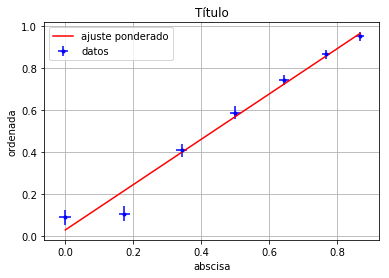

(1.0831387832766777,
 0.063006927112041991,
 0.027427305971984714,
 0.044206465378609977,
 0.99164628304211777)

In [3]:
sumx= sum(x*wy)
sumy= sum(y*wy)
sumx2= sum(x*x*wy)
sumy2= sum(y*y*wy) 
sumxy= sum(x*y*wy)
sumwy=sum(wy)
n=len(x)
promx=sumx/sumwy
promy=sumy/sumwy
w=sum(wy*(x-promx)**2)
promx2=sumx2/sumwy

m=(sumwy*sumxy-sumx*sumy)/(sumwy*sumx2-sumx*sumx)
b=(sumx2*sumy-sumx*sumxy)/(sumwy*sumx2-sumx*sumx)

deltay=y-(m*x+b)
sigmay= np.sqrt((sum(wy*deltay**2))/(n-2))
sigmam=np.sqrt(sigmay**2/w)
sigmab=np.sqrt(sigmay**2*(1/sumwy+promx2/w))

sx=np.sqrt(sumwy*sumx2-sumx*sumx)
sy=np.sqrt(sumwy*sumy2-sumy*sumy)
R2=(sumwy*sumxy-sumx*sumy)/(sx*sy)

plt.errorbar(x,y,xerr=ex,yerr=ey,fmt='.b',label='datos')
plt.plot(x,m*x+b,'r',label='ajuste ponderado')
plt.title("Título")
plt.xlabel("abscisa")
plt.ylabel("ordenada")
plt.grid()
plt.legend()
plt.show()

m,sigmam,b,sigmab,R2

In [8]:
# Ajustamos
f = lambda xl, A, B: A*xl+B # la función modelo, con la que ajustamos
popt, pcov = curve_fit(f, x, y, sigma = ey, absolute_sigma=True)
sigmas = np.sqrt([pcov[0,0],pcov[1,1]])
for i in range(2):
    print("{:.2f}+-{:.2f}".format(popt[i], sigmas[i]))  

1.08+-0.04
0.03+-0.02


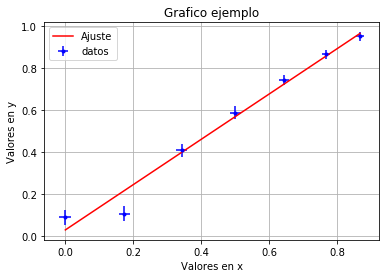

In [13]:
plt.plot(x,f(x, popt[0], popt[1]), 'r-', label = 'Ajuste') # Hacemos el gráfico en otro color de                                                                  #la función evaluada en los parámetros ajustados
plt.errorbar(x,y,xerr=ex,yerr=ey,fmt='.b',label='datos')

# Detalles del gráfico
plt.title('Grafico ejemplo')
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.legend(loc = 'best')
plt.grid()

plt.show()

In [33]:
z,zp = np.polyfit(x,y,1,w=wy,cov=True)
zerror = (np.diag(zp))**(1/2)

z,zerror

(array([ 1.07035333,  0.03561511]), array([ 0.07203617,  0.05168651]))